CODE BLOCK: 1

In [1]:
# del model
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from model import Net4
from utils import train, test
import torch.nn.functional as F

CODE BLOCK: 2

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? False


In [3]:
!pip install torchsummary
from torchsummary import summary
import torch
# use_cuda = torch.cuda.is_available()
# device = torch.device("cuda" if use_cuda else "cpu")
device=torch.device("mps")
model = Net4()#.to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]             100
              ReLU-2           [-1, 10, 26, 26]               0
       BatchNorm2d-3           [-1, 10, 26, 26]              20
            Conv2d-4           [-1, 10, 24, 24]             910
              ReLU-5           [-1, 10, 24, 24]               0
       BatchNorm2d-6           [-1, 10, 24, 24]              20
            Conv2d-7           [-1, 20, 22, 22]           1,820
              ReLU-8           [-1, 20, 22, 22]               0
       BatchNorm2d-9           [-1, 20, 22, 22]              40
           Conv2d-10           [-1, 10, 11, 11]             210
           Conv2d-11             [-1, 10, 9, 9]             910
             ReLU-12             [-1, 10, 9, 9]               0
      BatchNorm2d-13             [-1, 10, 9, 9]              20
           Conv2d-14             [-1, 1

CODE BLOCK: 3

In [4]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

CODE BLOCK: 5

In [6]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

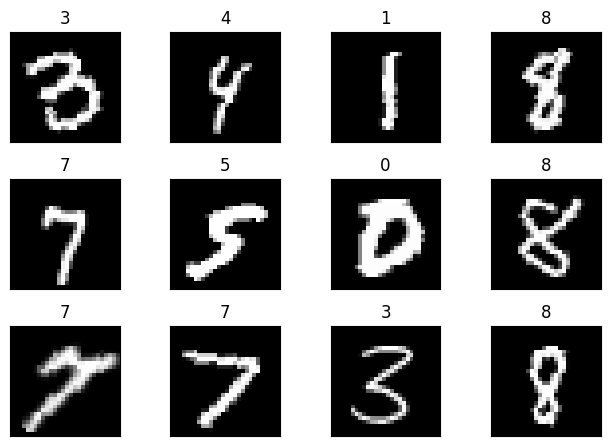

In [7]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 10

In [10]:
model = Net4().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc, train_losses = train(model, device, train_loader, optimizer, criterion)
  test_acc, test_losses = test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 1


Train: Loss=0.0789 Batch_id=117 Accuracy=88.47: 100%|██████████| 118/118 [00:08<00:00, 14.62it/s]


Test set: Average loss: 0.0616, Accuracy: 9818/10000 (98.18%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 2


Train: Loss=0.1048 Batch_id=117 Accuracy=97.53: 100%|██████████| 118/118 [00:06<00:00, 17.57it/s]


Test set: Average loss: 0.0445, Accuracy: 9858/10000 (98.58%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 3


Train: Loss=0.0178 Batch_id=117 Accuracy=97.92: 100%|██████████| 118/118 [00:07<00:00, 16.52it/s]


Test set: Average loss: 0.0393, Accuracy: 9875/10000 (98.75%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 4


Train: Loss=0.0328 Batch_id=117 Accuracy=98.28: 100%|██████████| 118/118 [00:06<00:00, 17.24it/s]


Test set: Average loss: 0.0327, Accuracy: 9895/10000 (98.95%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 5


Train: Loss=0.0246 Batch_id=117 Accuracy=98.44: 100%|██████████| 118/118 [00:06<00:00, 17.19it/s]


Test set: Average loss: 0.0341, Accuracy: 9899/10000 (98.99%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 6


Train: Loss=0.0232 Batch_id=117 Accuracy=98.45: 100%|██████████| 118/118 [00:06<00:00, 16.98it/s]


Test set: Average loss: 0.0278, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 7


Train: Loss=0.0639 Batch_id=117 Accuracy=98.56: 100%|██████████| 118/118 [00:07<00:00, 16.69it/s]


Test set: Average loss: 0.0273, Accuracy: 9920/10000 (99.20%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 8


Train: Loss=0.0356 Batch_id=117 Accuracy=98.88: 100%|██████████| 118/118 [00:07<00:00, 16.75it/s]


Test set: Average loss: 0.0223, Accuracy: 9932/10000 (99.32%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 9


Train: Loss=0.0042 Batch_id=117 Accuracy=98.98: 100%|██████████| 118/118 [00:07<00:00, 16.65it/s]


Test set: Average loss: 0.0221, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 10


Train: Loss=0.0242 Batch_id=117 Accuracy=98.99: 100%|██████████| 118/118 [00:07<00:00, 16.73it/s]


Test set: Average loss: 0.0213, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 11


Train: Loss=0.0234 Batch_id=117 Accuracy=99.03: 100%|██████████| 118/118 [00:07<00:00, 16.51it/s]


Test set: Average loss: 0.0218, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 12


Train: Loss=0.0593 Batch_id=117 Accuracy=99.02: 100%|██████████| 118/118 [00:07<00:00, 16.49it/s]


Test set: Average loss: 0.0210, Accuracy: 9936/10000 (99.36%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 13


Train: Loss=0.0657 Batch_id=117 Accuracy=99.01: 100%|██████████| 118/118 [00:07<00:00, 16.46it/s]


Test set: Average loss: 0.0215, Accuracy: 9935/10000 (99.35%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 14


Train: Loss=0.0054 Batch_id=117 Accuracy=99.06: 100%|██████████| 118/118 [00:07<00:00, 16.45it/s]


Test set: Average loss: 0.0211, Accuracy: 9937/10000 (99.37%)

Adjusting learning rate of group 0 to 5.0000e-04.
Epoch 15


Train: Loss=0.0653 Batch_id=117 Accuracy=99.07: 100%|██████████| 118/118 [00:07<00:00, 16.32it/s]


Test set: Average loss: 0.0208, Accuracy: 9937/10000 (99.37%)

Adjusting learning rate of group 0 to 5.0000e-04.


**Target**
1. Add an additional layer and thus more grunt and receptive field

**Results**
1. Train Acc: 99.07
2. Test Acc: 99.37
3. Parameters: 7980

**Analysis**
1. The model is very close to the target and thus pushing it a bit further should do the trick.

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")
plt.plot()

# Git Push

In [ ]:
!git add .

In [ ]:
!git config --global user.email "me18b059@smail.iitm.ac.in"
!git commit -m Final

In [ ]:
!git push